In [2]:
using ProRF, Printf, Statistics

In [3]:
R = RF("Data/AB")
X, Y, L = get_data(R, 'B', norm=true)
RI = RFI(R, 2:1:10, 100:100:200)

RFI("Data/AB/data.fasta", "Data/AB/data.xlsx", 1, 2:1:10, 100:100:200)

In [4]:
size(X)

(14483, 42)

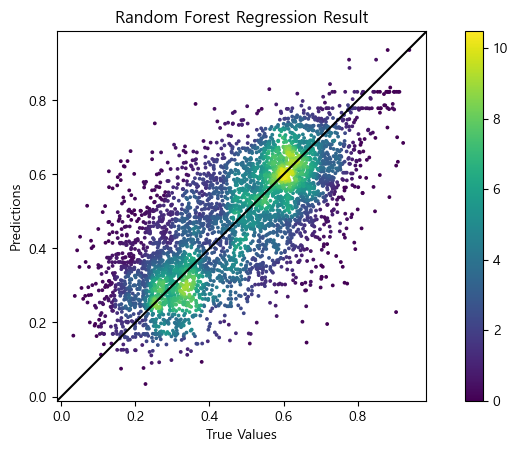

NRMSE : 0.147121


RandomForestRegressor
n_trees:             100
n_subfeatures:       6
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            Ensemble of Decision Trees
Trees:      100
Avg Leaves: 4932.7
Avg Depth:  120.94

In [4]:
rf_model(X, Y, 6, 100)

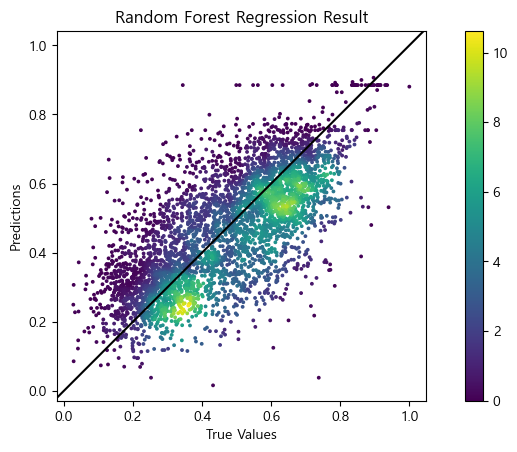

NRMSE : 0.137199


RandomForestRegressor
n_trees:             100
n_subfeatures:       7
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            Ensemble of Decision Trees
Trees:      100
Avg Leaves: 4872.88
Avg Depth:  121.87

In [5]:
rf_model(X, Y, 7, 100)

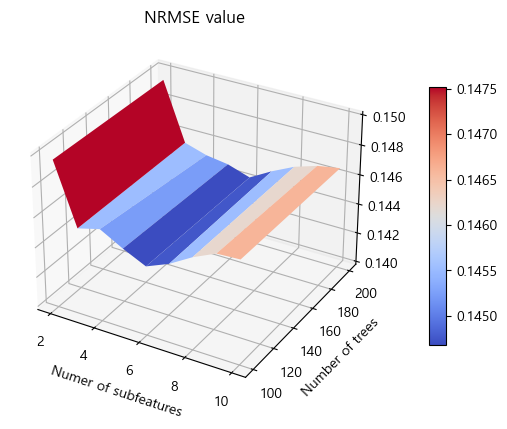

9×2 Matrix{Float64}:
 0.14961   0.149428
 0.145567  0.145499
 0.145963  0.145036
 0.145136  0.144813
 0.144423  0.14432
 0.145053  0.145166
 0.145948  0.145887
 0.146644  0.146365
 0.146727  0.146628

In [8]:
Z = get_reg_value(RI, X, Y)

In [3]:
RI = RFI(R, 5:1:7, 800:200:1800);

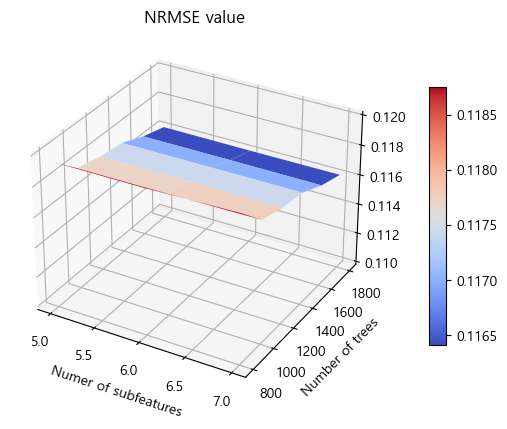

3×6 Matrix{Float64}:
 0.11946   0.117908  0.117523  0.11732   0.11665   0.116186
 0.119474  0.117934  0.117552  0.117331  0.116655  0.116169
 0.119637  0.117992  0.117567  0.117335  0.116639  0.116177

In [4]:
Z = get_reg_value(RI, X, Y)

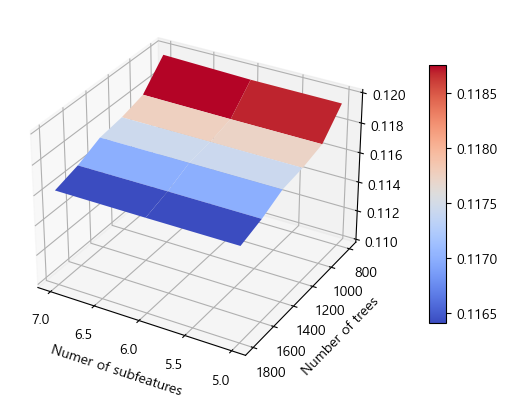

In [5]:
view_reg3d(RI, Z, azim=120)

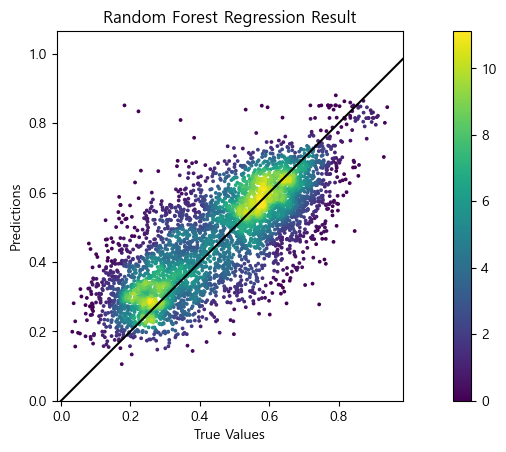

NRMSE : 0.130067


RandomForestRegressor
n_trees:             1000
n_subfeatures:       6
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            Ensemble of Decision Trees
Trees:      1000
Avg Leaves: 4948.529
Avg Depth:  125.18

In [6]:
rf_model(X, Y, 6, 1000)

In [4]:
ans = Vector{Vector{Float64}}()
for i in 1:10
    println(i)
    data_state, learn_state = @seed, @seed
    nrmse_vector = Vector{Float64}()
    for d in 20:10:100
        push!(nrmse_vector, rf_nrmse(X, Y, 6, 1000, max_depth=d, val_mode=true, data_state=data_state, learn_state=learn_state)[2])
    end
    push!(ans, nrmse_vector)
end
ans = Matrix{Float64}(hcat(ans...))
sans = std.(eachrow(ans))
mans = mean.(eachrow(ans))

1

2

3


4

5

6

7

8

9

10

9-element Vector{Float64}:
 0.1381446750161114
 0.12730493136197554
 0.12168814805436019
 0.11909194750606769
 0.11901724301851031
 0.12030203520485541
 0.12144751756246434
 0.12249959702373907
 0.12326579391722861

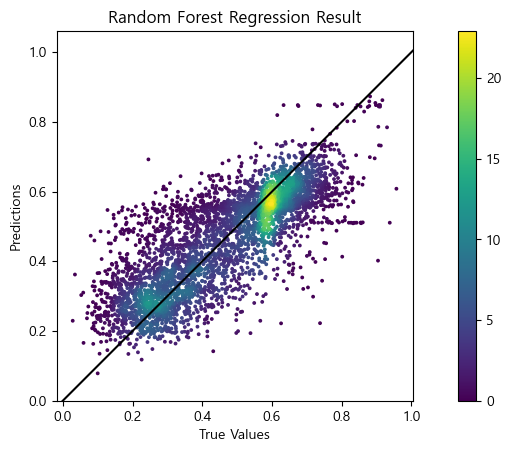

NRMSE : 0.121693


RandomForestRegressor
n_trees:             1000
n_subfeatures:       6
partial_sampling:    0.7
max_depth:           60
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            Ensemble of Decision Trees
Trees:      1000
Avg Leaves: 3168.827
Avg Depth:  60.0

In [5]:
rf_model(X, Y, 6, 1000, max_depth=60)